In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import plotly.express as px
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv(r'C:\Users\tanma_47mbjdu\Downloads\ifood_df.csv')

In [4]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [5]:
df.shape

(2205, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [7]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [8]:
df.duplicated().sum()

184

In [9]:
data=df.drop_duplicates()
data.shape

(2021, 39)

In [10]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,0.251856,0.034636,0.090549,0.024245,0.502227,0.165760,0.217219,563.789213,519.867392,0.302326
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.434186,0.182902,0.287038,0.153848,0.500119,0.371957,0.412455,576.775749,554.797857,0.680812
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


In [11]:
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [12]:
data["Age"].max()

80

In [13]:
data["Age"].min()

24

In [14]:
def age_segment(a):
    if a<=30:
        return "20s"
    elif a>30 and a<=40:
        return "30s"
    elif a>40 and a<=50:
        return "40s"
    elif a>50 and a<=60:
        return "50s"
    elif a>60 and a<=70:
        return "60s"
    elif a>70 and a<=80:
        return "70s"
data["age_segment"]=data["Age"].apply(age_segment)
data["age_segment"]

0       60s
1       60s
2       50s
3       30s
4       30s
       ... 
2198    30s
2200    50s
2202    30s
2203    60s
2204    60s
Name: age_segment, Length: 2021, dtype: object

In [15]:
data["marital_Divorced"].replace({1:"Divorced"},inplace=True)
data["marital_Married"].replace({1:"Married"},inplace=True)
data["marital_Single"].replace({1:"Single"},inplace=True)
data["marital_Together"].replace({1:"Together"},inplace=True)
data["marital_Widow"].replace({1:"Widow"},inplace=True)

In [16]:
data['marital_status'] = data[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].apply(lambda row: next((val for val in row if val != 0), 0), axis=1)
data['marital_status']

0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2198      Single
2200     Married
2202    Divorced
2203    Together
2204     Married
Name: marital_status, Length: 2021, dtype: object

In [17]:
data.drop(columns=['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow'],axis=1,inplace=True)

In [19]:
data.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,age_segment,marital_status
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,60s,Single
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,60s,Single
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,50s,Together
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,30s,Together
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,30s,Married


In [20]:
data["education_Basic"].replace({1:"Basic"},inplace=True)
data["education_Graduation"].replace({1:"Graduation"},inplace=True)
data["education_Master"].replace({1:"Master"},inplace=True)
data["education_PhD"].replace({1:"PHD"},inplace=True)
data['education_status'] = data[['education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].apply(lambda row: next((val for val in row if val != 0), 0), axis=1)
data.drop(columns=['education_Basic', 'education_Graduation', 'education_Master', 'education_PhD'],axis=1,inplace=True)

In [21]:
data['education_status'].replace({0:"2 Cycle"},inplace=True)

In [22]:
data['education_status'].unique()

array(['Graduation', 'PHD', 'Master', 'Basic', '2 Cycle'], dtype=object)

In [23]:
data.shape

(2021, 33)

In [24]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'education_2n Cycle', 'MntTotal',
       'MntRegularProds', 'AcceptedCmpOverall', 'age_segment',
       'marital_status', 'education_status'],
      dtype='object')

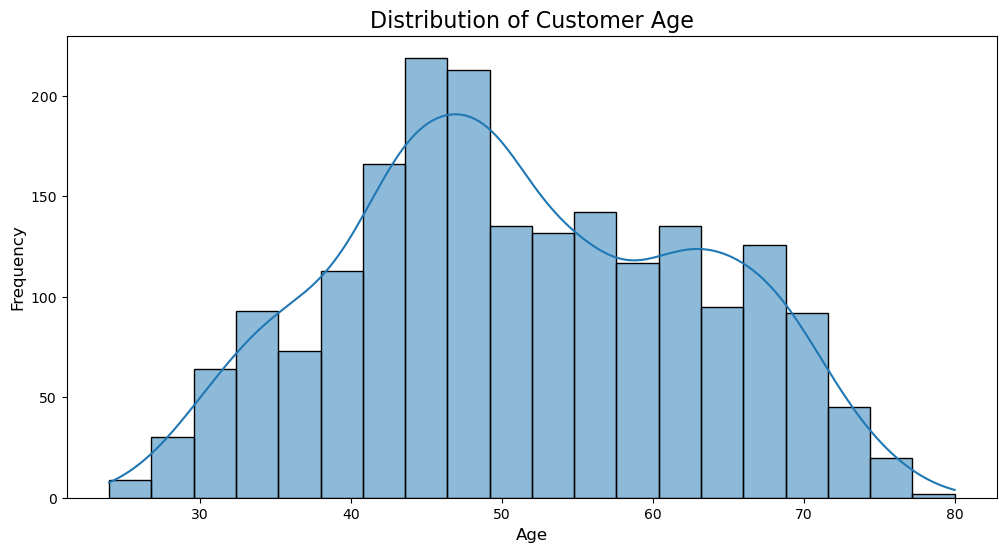

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(data["Age"],kde=True)
plt.title('Distribution of Customer Age', fontsize=16)  # Set the title of the plot
plt.xlabel('Age', fontsize=12)  # Set the label for the x-axis
plt.ylabel('Frequency', fontsize=12)  # Set the label for the y-axis
plt.show() 

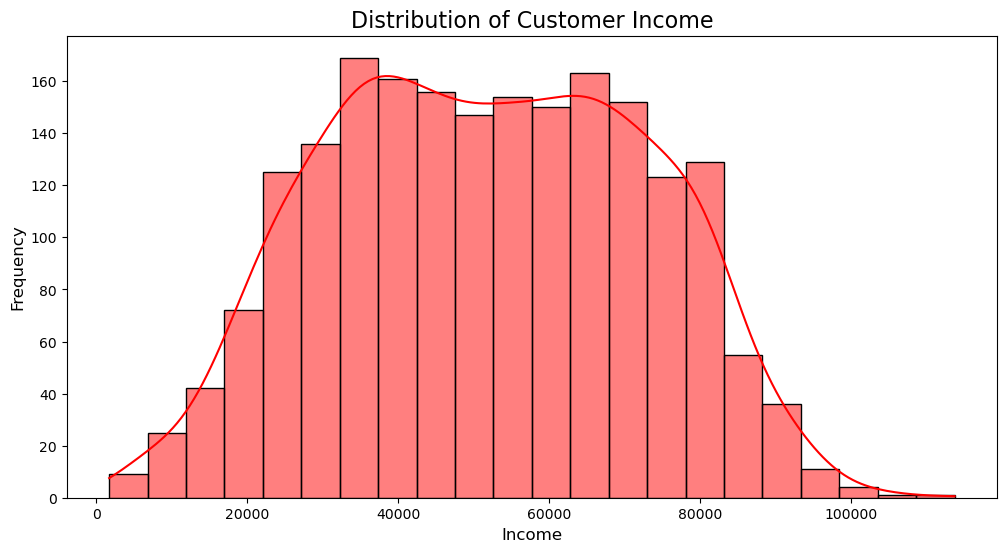

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(data["Income"],kde=True,color="r")
plt.title('Distribution of Customer Income', fontsize=16)  # Set the title of the plot
plt.xlabel('Income', fontsize=12)  # Set the label for the x-axis
plt.ylabel('Frequency', fontsize=12)  # Set the label for the y-axis
plt.show() 

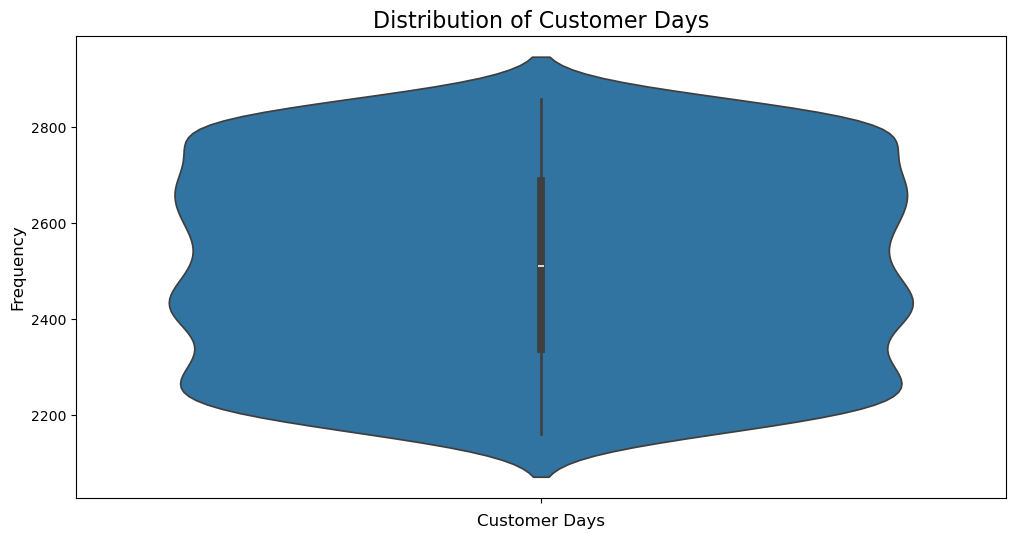

In [27]:
plt.figure(figsize=(12,6))
sns.violinplot(data["Customer_Days"])
plt.title('Distribution of Customer Days', fontsize=16)  # Set the title of the plot
plt.xlabel('Customer Days', fontsize=12)  # Set the label for the x-axis
plt.ylabel('Frequency', fontsize=12)  # Set the label for the y-axis
plt.show() 

In [5]:
f= plt.figure(figsize=(12,6))

ax=f.add_subplot(121)
sns.distplot(data["Teenhome"],color='b',ax=ax)
ax.set_title('Distribution of Teen for houshold')

ax=f.add_subplot(122)
sns.distplot(data["Kidhome"],color='r',ax=ax)
ax.set_title('Distribution of Kids for houshold')
plt.show()


NameError: name 'plt' is not defined

In [30]:
data["children"]=data["Teenhome"]+data["Kidhome"]

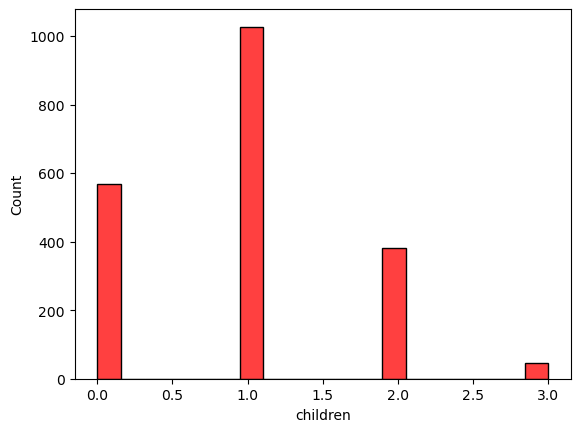

In [31]:
sns.histplot(data["children"],color='r')
ax.set_title('Distribution of Children for houshold')
plt.show()

<Axes: xlabel='Age', ylabel='Income'>

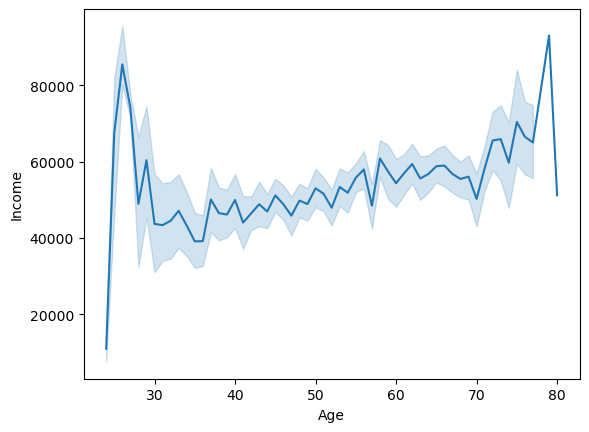

In [32]:
sns.lineplot(data,y=data["Income"],x=data["Age"])

<Axes: xlabel='education_status', ylabel='Income'>

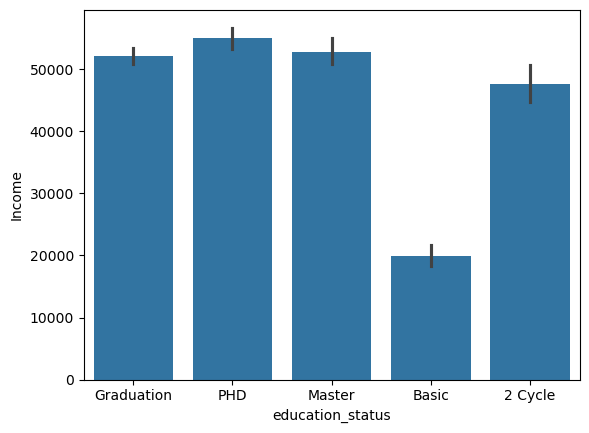

In [33]:
sns.barplot(data,y=data["Income"],x=data["education_status"])

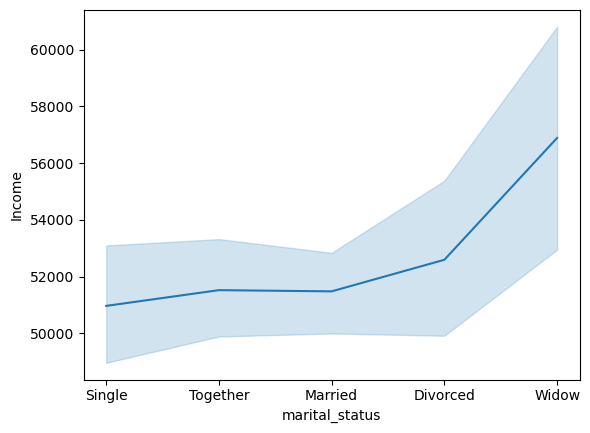

In [34]:
sns.lineplot(data,y=data["Income"],x=data["marital_status"])
plt.show()

In [35]:
g1=data.groupby(data["marital_status"])["Income"].mean().reset_index()
g1

,marital_status,Income
0,Divorced,52596.429907
1,Married,51483.667516
2,Single,50971.702032
3,Together,51526.280943
4,Widow,56889.914286


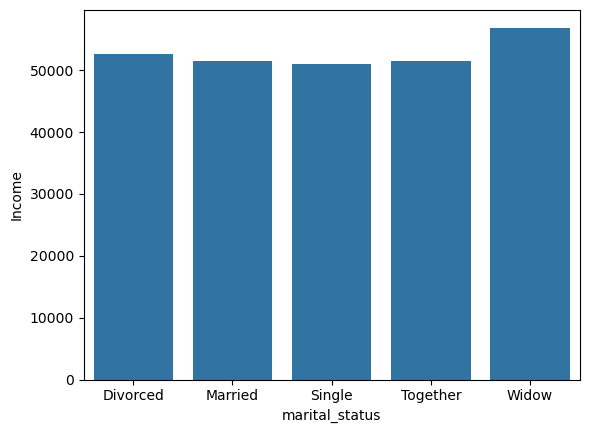

In [36]:
sns.barplot(g1,y=g1["Income"],x=g1["marital_status"])
plt.show()

In [37]:
products=["MntWines","MntFruits","MntMeatProducts","MntFishProducts",'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
g2=data.groupby("children")[products].sum().reset_index()
g2

,children,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,0,282062,30098,212148,43772,30832,36424,643,2550,2686,4172
1,1,275423,19858,100815,27520,20800,41639,2550,4404,2195,5748
2,2,54692,3034,19873,4461,3228,9868,1361,1243,420,1649
3,3,7244,293,2771,244,250,835,155,120,44,168


In [38]:
g2=data.groupby("children")[products].mean().reset_index()
g2

,children,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,0,497.463845,53.082892,374.158730,77.199295,54.377425,64.239859,1.134039,4.497354,4.737213,7.358025
1,1,268.182084,19.335930,98.164557,26.796495,20.253165,40.544304,2.482960,4.288218,2.137293,5.596884
2,2,143.172775,7.942408,52.023560,11.678010,8.450262,25.832461,3.562827,3.253927,1.099476,4.316754
3,3,160.977778,6.511111,61.577778,5.422222,5.555556,18.555556,3.444444,2.666667,0.977778,3.733333


In [39]:
children_counts = data['children'].value_counts().reset_index()
children_counts

,children,count
0,1,1027
1,0,567
2,2,382
3,3,45


In [40]:
data.groupby("children").agg(
    mean_age=("Age", "mean"),
    count=("Age", "count"))

,mean_age,count
children,,
0,51.472663,567
1,49.503408,1027
2,54.206806,382
3,57.244444,45


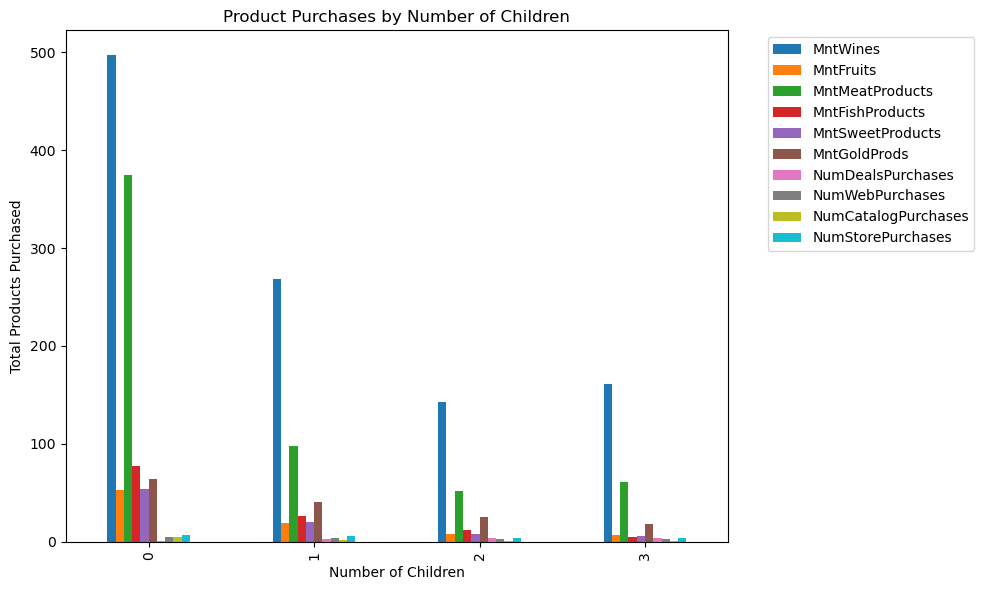

In [41]:
g2.set_index("children")[products].plot(kind="bar", figsize=(10, 6))
plt.title("Product Purchases by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Total Products Purchased")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

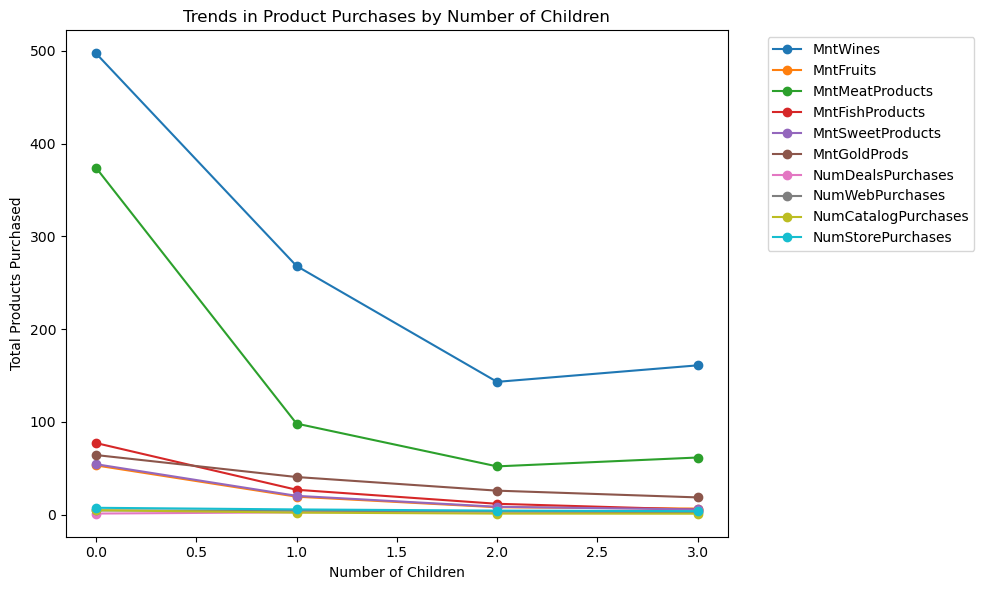

In [42]:
g2.set_index("children")[products].plot(kind="line", marker='o', figsize=(10, 6))
plt.title("Trends in Product Purchases by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Total Products Purchased")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [43]:
products=["MntWines","MntFruits","MntMeatProducts","MntFishProducts",'MntSweetProducts',
       'MntGoldProds',]
g3=data[products].sum().reset_index()
dP=pd.DataFrame(g3)
dP.rename(columns={"index":"Product",0:'Amount'},inplace=True)
dP

,Product,Amount
0,MntWines,619421
1,MntFruits,53283
2,MntMeatProducts,335607
3,MntFishProducts,75997
4,MntSweetProducts,55110
5,MntGoldProds,88766


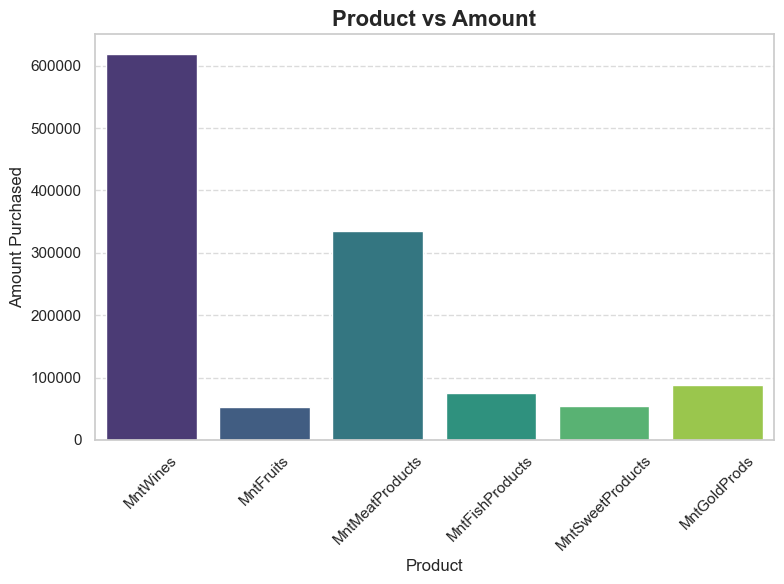

In [44]:
# Sample code for customization
sns.set_theme(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
ax = sns.barplot(data=dP, x="Product", y="Amount", palette="viridis")  # Customize colors with a palette

# Add customizations
ax.set_title("Product vs Amount", fontsize=16, fontweight='bold')  # Title
ax.set_xlabel("Product", fontsize=12)  # X-axis label
ax.set_ylabel("Amount Purchased", fontsize=12)  # Y-axis label
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on the y-axis

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

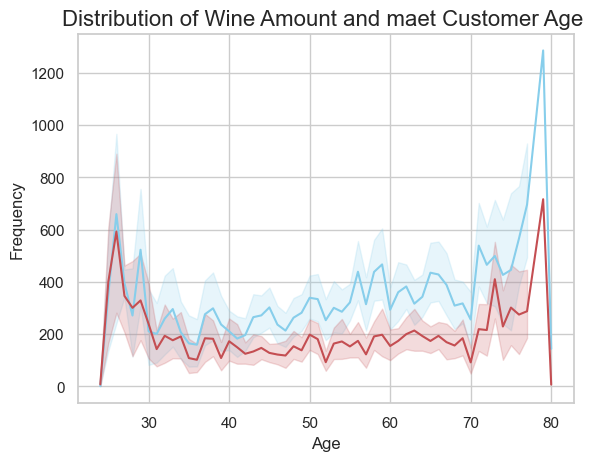

In [45]:
sns.lineplot(data,x='Age',y="MntWines",color='skyblue')
sns.lineplot(data,x='Age',y="MntMeatProducts",color='r')
plt.title('Distribution of Wine Amount and maet Customer Age ', fontsize=16)  # Set the title of the plot
plt.xlabel('Age', fontsize=12)  # Set the label for the x-axis
plt.ylabel('Frequency', fontsize=12)  # Set the label for the y-axis
plt.show()

In [46]:
g5=data.groupby("education_status")[products].mean().reset_index()
count = data['education_status'].value_counts().reset_index()
g5

,education_status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,2 Cycle,206.262295,29.316940,136.076503,46.628415,35.289617,46.934426
1,Basic,7.795918,11.204082,11.816327,17.734694,12.612245,22.755102
2,Graduation,285.148768,31.301478,181.421675,43.929064,31.729064,50.467980
3,Master,338.361194,21.940299,165.570149,32.080597,21.277612,40.665672
4,PHD,406.642369,18.788155,160.630979,25.649203,19.820046,32.378132


In [47]:
g5=data.groupby("education_status")[products].sum().reset_index()
count = data['education_status'].value_counts().reset_index()
g5

,education_status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,2 Cycle,37746,5365,24902,8533,6458,8589
1,Basic,382,549,579,869,618,1115
2,Graduation,289426,31771,184143,44588,32205,51225
3,Master,113351,7350,55466,10747,7128,13623
4,PHD,178516,8248,70517,11260,8701,14214


In [48]:
g5 = pd.merge(count, g5, on='education_status', how='inner')

In [49]:
g5['AvgAge'] = data.groupby("education_status")['Age'].mean().reset_index(drop=True)
g5['Avgchild'] = data.groupby("education_status")['children'].sum().reset_index(drop=True)
g5['Income'] = data.groupby("education_status")['Income'].mean().reset_index(drop=True)
g5

,education_status,count,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AvgAge,Avgchild,Income
0,Graduation,1015,289426,31771,184143,44588,32205,51225,46.918033,162,47586.327869
1,PHD,439,178516,8248,70517,11260,8701,14214,42.183673,36,19913.346939
2,Master,335,113351,7350,55466,10747,7128,13623,50.512315,954,52150.761576
3,2 Cycle,183,37746,5365,24902,8533,6458,8589,53.008955,328,52864.582090
4,Basic,49,382,549,579,869,618,1115,53.820046,446,54973.211845


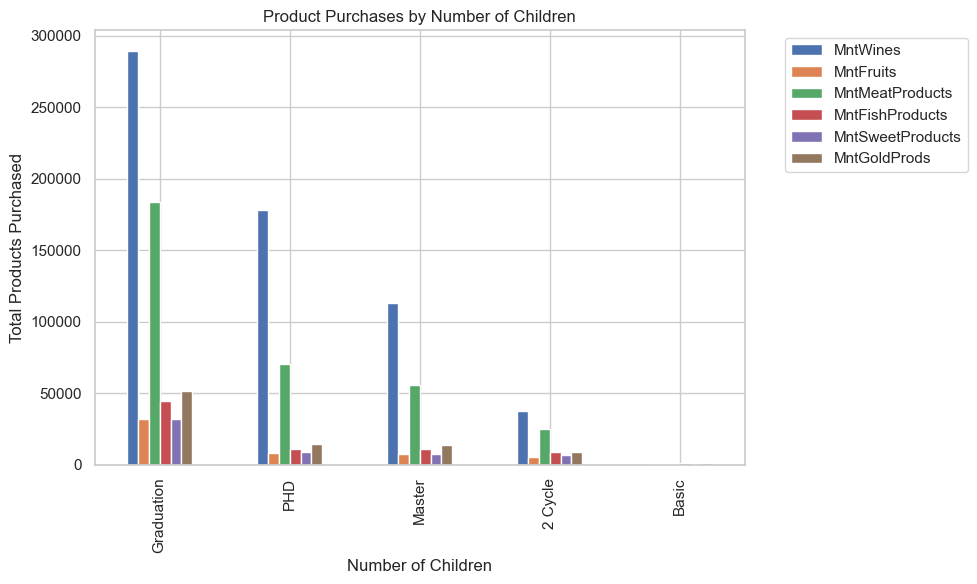

In [50]:
g5.set_index("education_status")[products].plot(kind="bar", figsize=(10, 6))
plt.title("Product Purchases by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Total Products Purchased")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [51]:
age_segment=data.groupby("age_segment")[products].mean().reset_index()
count = data['age_segment'].value_counts().reset_index()
age_segment=pd.merge(age_segment,count,on="age_segment")
age_segment['Avgchild'] = data.groupby("age_segment")['children'].sum().reset_index(drop=True)
age_segment['Income'] = data.groupby("age_segment")['Income'].mean().reset_index(drop=True)
age_segment

,age_segment,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,count,Avgchild,Income
0,20s,344.054545,40.036364,305.800000,54.581818,36.763636,62.218182,55,11,54089.181818
1,30s,229.856269,26.177370,155.721713,35.718654,26.685015,39.000000,327,226,45015.605505
2,40s,259.116592,23.113602,141.886398,33.786248,25.485800,39.600897,669,715,48520.165919
3,50s,337.501099,26.738462,159.400000,35.536264,25.501099,45.621978,455,499,53721.826374
4,60s,357.318290,27.510689,178.695962,41.406176,28.866983,49.862233,421,431,56775.964371
5,70s,510.553191,35.212766,267.946809,54.372340,37.829787,46.255319,94,44,63391.904255


In [52]:
age_segment=data.groupby("age_segment")[products].sum().reset_index()
count = data['age_segment'].value_counts().reset_index()
age_segment=pd.merge(age_segment,count,on="age_segment")
age_segment['Avgchild'] = data.groupby("age_segment")['children'].mean().reset_index(drop=True)
age_segment['Income'] = data.groupby("age_segment")['Z_CostContact'].mean().reset_index(drop=True)
age_segment

,age_segment,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,count,Avgchild,Income
0,20s,18923,2202,16819,3002,2022,3422,55,0.200000,3.0
1,30s,75163,8560,50921,11680,8726,12753,327,0.691131,3.0
2,40s,173349,15463,94922,22603,17050,26493,669,1.068759,3.0
3,50s,153563,12166,72527,16169,11603,20758,455,1.096703,3.0
4,60s,150431,11582,75231,17432,12153,20992,421,1.023753,3.0
5,70s,47992,3310,25187,5111,3556,4348,94,0.468085,3.0


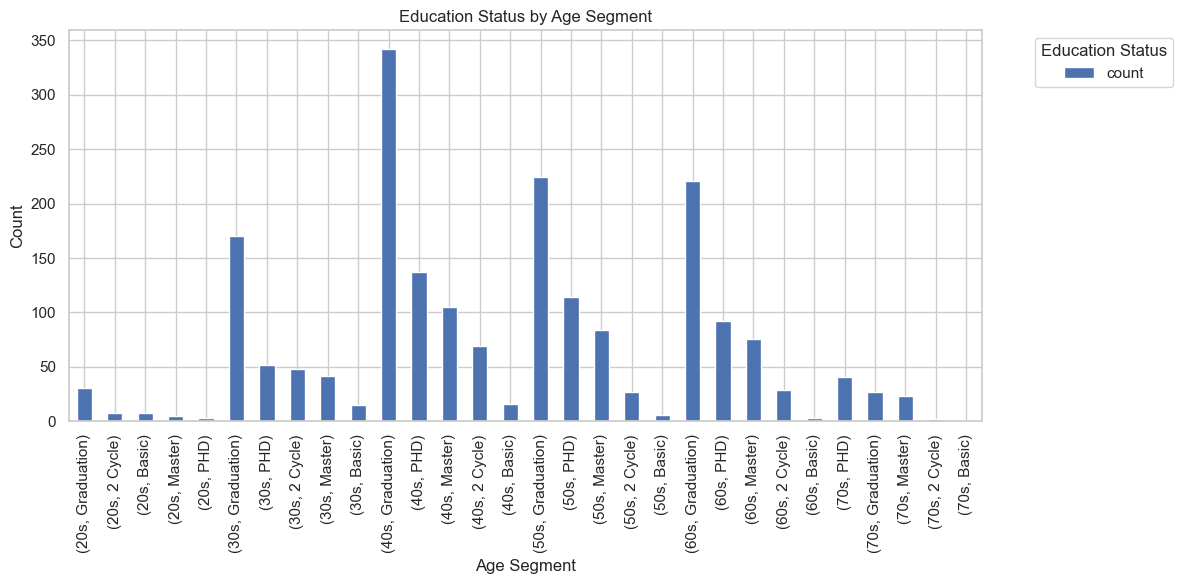

In [53]:
 x=data.groupby("age_segment")['education_status'].value_counts()
x.plot(kind='bar', figsize=(12, 6))
plt.title('Education Status by Age Segment')
plt.ylabel('Count')
plt.xlabel('Age Segment')
plt.legend(title='Education Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [54]:
x=data.groupby("marital_status")[products].mean().reset_index()
count = data['marital_status'].value_counts().reset_index()
x['Avgchild'] = data.groupby("marital_status")['children'].mean().reset_index(drop=True)
x['Income'] = data.groupby("marital_status")['Income'].mean().reset_index(drop=True)
x

,marital_status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Avgchild,Income
0,Divorced,325.186916,27.228972,152.238318,34.088785,26.485981,45.859813,1.023364,52596.429907
1,Married,301.573248,25.805096,159.486624,35.774522,26.971975,43.028025,0.977070,51483.667516
2,Single,292.243792,27.241535,182.478555,38.799097,27.137698,44.248307,0.860045,50971.702032
3,Together,308.051081,25.461690,164.239686,39.141454,26.734774,42.436149,0.982318,51526.280943
4,Widow,383.342857,31.014286,191.357143,50.114286,37.700000,56.757143,0.842857,56889.914286


In [55]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'education_2n Cycle', 'MntTotal',
       'MntRegularProds', 'AcceptedCmpOverall', 'age_segment',
       'marital_status', 'education_status', 'children'],
      dtype='object')

In [56]:
train_data=data[["Income","education_status","marital_status","Age","children"]]
train_data.head()

,Income,education_status,marital_status,Age,children
0,58138.0,Graduation,Single,63,0
1,46344.0,Graduation,Single,66,2
2,71613.0,Graduation,Together,55,0
3,26646.0,Graduation,Together,36,1
4,58293.0,PHD,Married,39,1


In [57]:
train_data["education_status"]=pd.Categorical(train_data['education_status']).codes
train_data["marital_status"]=pd.Categorical(train_data['marital_status']).codes

In [58]:
train_data.head()

,Income,education_status,marital_status,Age,children
0,58138.0,2,2,63,0
1,46344.0,2,2,66,2
2,71613.0,2,3,55,0
3,26646.0,2,3,36,1
4,58293.0,4,1,39,1


In [59]:
scaler=StandardScaler()

In [60]:
train_data[["Income", "education_status", "marital_status", "Age", "children"]] = scaler.fit_transform(train_data[["Income", "education_status", "marital_status", "Age", "children"]])

In [61]:
train_data

,Income,education_status,marital_status,Age,children
0,0.311511,-0.351045,0.263169,1.018689,-1.277576
1,-0.258030,-0.351045,0.263169,1.275875,1.403609
2,0.962228,-0.351045,1.206189,0.332861,-1.277576
3,-1.209260,-0.351045,1.206189,-1.295981,0.063016
4,0.318996,1.427054,-0.679852,-1.038796,0.063016
...,...,...,...,...,...
2198,-1.201050,-0.351045,0.263169,-1.467438,-1.277576
2200,0.460488,-0.351045,-0.679852,0.161404,0.063016
2202,0.255638,-0.351045,-1.622873,-1.038796,-1.277576
2203,0.847876,0.538004,1.206189,1.104418,0.063016


In [62]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(train_data)

KMeans(n_clusters=5)

In [63]:
train_data["Labels"]=kmeans.labels_

In [64]:
train_data

,Income,education_status,marital_status,Age,children,Labels
0,0.311511,-0.351045,0.263169,1.018689,-1.277576,0
1,-0.258030,-0.351045,0.263169,1.275875,1.403609,4
2,0.962228,-0.351045,1.206189,0.332861,-1.277576,0
3,-1.209260,-0.351045,1.206189,-1.295981,0.063016,2
4,0.318996,1.427054,-0.679852,-1.038796,0.063016,1
...,...,...,...,...,...,...
2198,-1.201050,-0.351045,0.263169,-1.467438,-1.277576,2
2200,0.460488,-0.351045,-0.679852,0.161404,0.063016,1
2202,0.255638,-0.351045,-1.622873,-1.038796,-1.277576,3
2203,0.847876,0.538004,1.206189,1.104418,0.063016,4


In [65]:
fig = px.scatter_3d(train_data, x='Income', y='education_status', z='marital_status', color='Labels', title='3D Cluster Visualization')
fig.show()

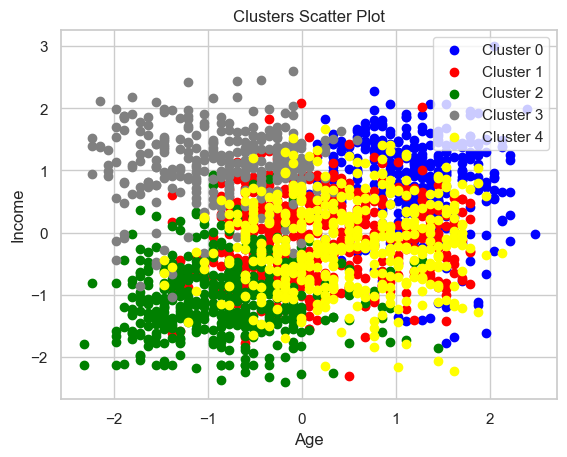

In [66]:
# Define colors and labels for each cluster
clusters = {
    0: ('blue', 'Cluster 0'),
    1: ('red', 'Cluster 1'),
    2: ('green', 'Cluster 2'),
    3: ('gray', 'Cluster 3'),
    4: ('black', 'Cluster 4'),
    4: ('pink', 'Cluster 4'),
    4: ('yellow', 'Cluster 4'),
}
data=train_data
# Iterate through each cluster and plot it
for cluster, (color, label) in clusters.items():
    plt.scatter(y=data[data["Labels"] == cluster]['Income'], 
                x=data[data['Labels'] == cluster]['Age'], 
                color=color, 
                label=label)

# Add labels, title, and legend
plt.legend()
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clusters Scatter Plot')
plt.show()